In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [3]:
# Load the dataset
df = pd.read_csv(r'C:\Users\Vivek\Downloads\car data.csv')

In [5]:
# check the first five rows
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
# Exploratory Data Analysis (EDA)
df.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1  

In [12]:
# Treat missing values if any
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [14]:
df.shape

(301, 9)

In [17]:
# Transform categorical data using Label Encoding
label_encoder = LabelEncoder()
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Seller_Type'] = label_encoder.fit_transform(df['Seller_Type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])

In [18]:
# Separate features and target variable
X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
y = df['Selling_Price']

In [19]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Apply Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Print the model results
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Training R-squared:", r2_score(y_train, y_pred_train))
print("Testing R-squared:", r2_score(y_test, y_pred_test))
print("Training Adjusted R-squared:", 1 - (1 - r2_score(y_train, y_pred_train)) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1))
print("Testing Adjusted R-squared:", 1 - (1 - r2_score(y_test, y_pred_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
print("Root Mean Squared Error (RMSE) on Test Data:", np.sqrt(mean_squared_error(y_test, y_pred_test)))


Training R-squared: 0.8839793496750801
Testing R-squared: 0.8468053957654174
Training Adjusted R-squared: 0.8804787266049316
Testing Adjusted R-squared: 0.826572146149529
Root Mean Squared Error (RMSE) on Test Data: 1.878543918543866


In [22]:
# Get the feature importance
feature_importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)



Feature Importance:
Present_Price    0.439942
Year             0.363623
Kms_Driven      -0.000005
Owner           -0.920155
Seller_Type     -1.168669
Fuel_Type       -1.323899
Transmission    -1.636447
dtype: float64


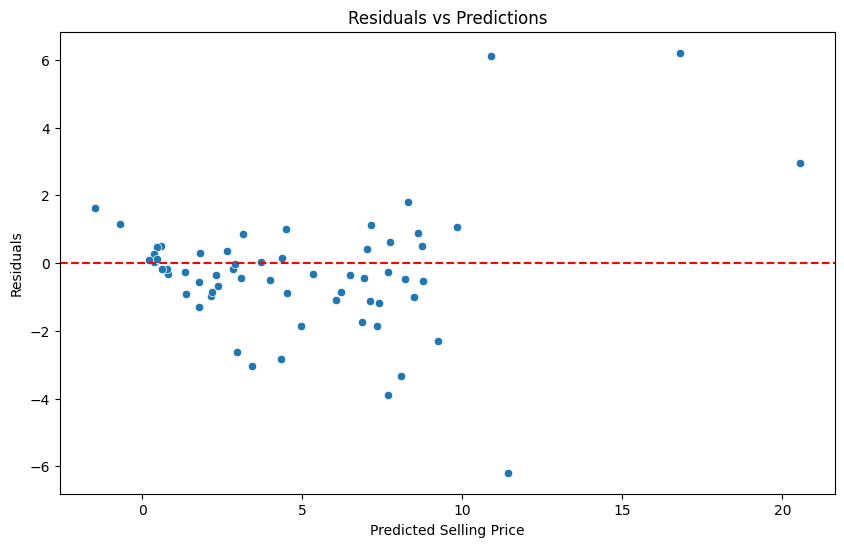

In [24]:
# Visualize diagnostic plots
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_test, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predictions')
plt.xlabel('Predicted Selling Price')
plt.ylabel('Residuals')
plt.show()